In [3]:
library(caret)
library(pROC)
head(iris)
table(iris$Species)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa



    setosa versicolor  virginica 
        50         50         50 

In [4]:
df <- iris[iris$Species!='setosa',]
head(df)
dim(df)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
51,7.0,3.2,4.7,1.4,versicolor
52,6.4,3.2,4.5,1.5,versicolor
53,6.9,3.1,4.9,1.5,versicolor
54,5.5,2.3,4.0,1.3,versicolor
55,6.5,2.8,4.6,1.5,versicolor
56,5.7,2.8,4.5,1.3,versicolor


[1] 100   5

In [5]:
model <- train(df[,1:4], factor(df[,5]), 
               method = 'lda', 
               metric = 'ROC', 
               trControl = trainControl(method = 'repeatedcv', 
                                        number = 10, 
                                        repeats = 20, 
                                        savePredictions = T, 
                                        summaryFunction = twoClassSummary, 
                                        classProbs = T))

In [6]:
model

Linear Discriminant Analysis 

100 samples
  4 predictor
  2 classes: 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 20 times) 
Summary of sample sizes: 90, 90, 90, 90, 90, 90, ... 
Resampling results:

  ROC     Sens   Spec
  0.9948  0.947  0.98


### We are going to calculate the TPR and FPR (= 1-TNR) for all possible thresholds. 

In [12]:
myRoc <- roc(response = model$pred$obs, predictor = model$pred$versicolor, positive = 'versicolor')
myRoc[]

$percent
[1] FALSE

$sensitivities
   [1] 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000
  [13] 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000
  [25] 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000
  [37] 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000
  [49] 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000
  [61] 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000
  [73] 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000
  [85] 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000
  [97] 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000
 [109] 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000
 [121] 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000
 [133] 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000
 [145] 1.000 1.00

In [14]:
# Print out some samples
data.frame(myRoc$sensitivities, myRoc$specificities, myRoc$thresholds)[1000:1010,]

,myRoc.sensitivities,myRoc.specificities,myRoc.thresholds
1000,0.971,0.970,0.3191599
1001,0.970,0.970,0.3172699
1002,0.969,0.970,0.3152620
1003,0.968,0.970,0.3137301
1004,0.967,0.970,0.3123299
1005,0.967,0.971,0.3114548
1006,0.967,0.972,0.3103643
1007,0.966,0.972,0.3099295
1008,0.965,0.972,0.3092209
1009,0.964,0.972,0.3084030


### Plot the ROC

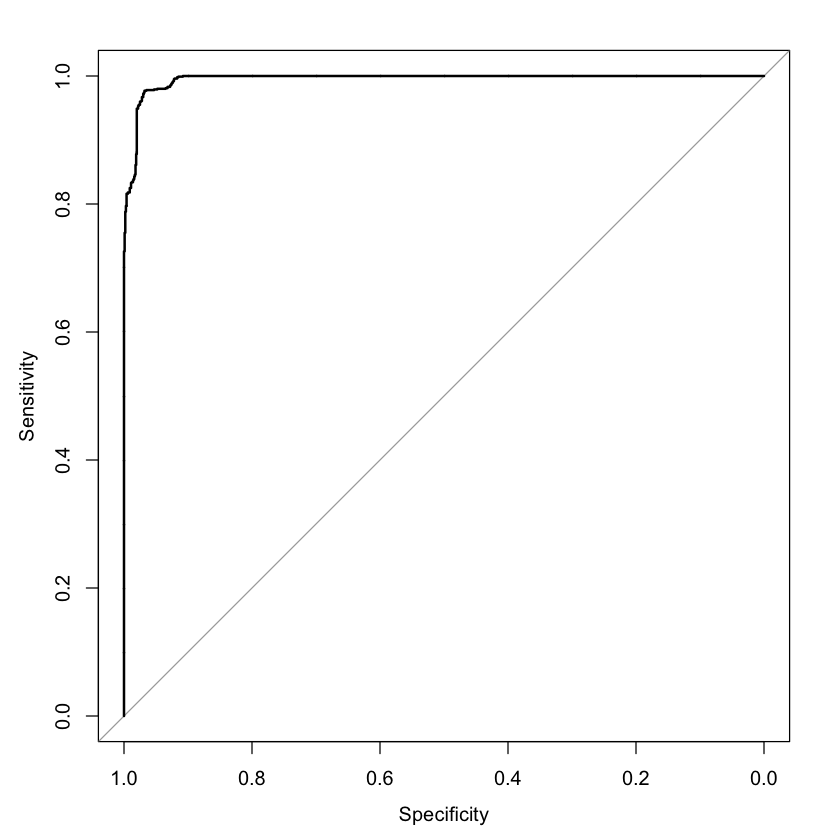

In [15]:
plot(myRoc)